In [1]:
from google.colab import drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/Drive/MyDrive/Datasets/DL/A2/data.csv')
data.head(100)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2458,Female,78.0,0,0,Yes,Private,Rural,235.63,32.3,never smoked,1
96,35512,Female,70.0,0,0,Yes,Self-employed,Rural,76.34,24.4,formerly smoked,1
97,56841,Male,58.0,0,1,Yes,Private,Rural,240.59,31.4,smokes,1
98,8154,Male,57.0,1,0,Yes,Govt_job,Urban,78.92,27.7,formerly smoked,1


In [4]:
data = data.sample(frac=1).reset_index(drop=True)
data.head(1000)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,61291,Male,28.0,0,0,Yes,Private,Rural,169.49,27.2,Unknown,0
1,35152,Male,10.0,0,0,No,children,Urban,76.92,15.8,Unknown,0
2,63773,Female,13.0,0,0,No,children,Rural,146.10,22.8,never smoked,0
3,59437,Female,57.0,0,0,Yes,Private,Urban,221.89,37.3,smokes,1
4,57159,Male,56.0,0,0,Yes,Self-employed,Rural,125.87,24.6,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,47208,Female,70.0,0,0,Yes,Self-employed,Rural,62.67,27.7,never smoked,0
996,49883,Female,41.0,0,0,Yes,Private,Rural,65.40,36.9,formerly smoked,0
997,50775,Male,46.0,0,0,No,Private,Urban,124.61,37.4,Unknown,0
998,55459,Female,60.0,0,0,No,Private,Rural,91.82,28.3,formerly smoked,0


In [5]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### Since there are 201 missing values in BMI Column, we use data imputation technique to fill in the values

In [6]:
from sklearn.impute import SimpleImputer

df_male=data[data.gender=='Male']#male dataset
df_female=data[data.gender=='Female']#female dataset
imputer = SimpleImputer(strategy='mean')
# Fit the imputer on your data
imputer.fit(data[['bmi']])
df_male['bmi'] = imputer.transform(df_male[['bmi']])
df_female['bmi'] = imputer.transform(df_female[['bmi']])
#concating both dataset
data=pd.concat([df_male, df_female], ignore_index=True)
data

<ipython-input-6-85d23943c814>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male['bmi'] = imputer.transform(df_male[['bmi']])
<ipython-input-6-85d23943c814>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female['bmi'] = imputer.transform(df_female[['bmi']])


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,61291,Male,28.0,0,0,Yes,Private,Rural,169.49,27.200000,Unknown,0
1,35152,Male,10.0,0,0,No,children,Urban,76.92,15.800000,Unknown,0
2,57159,Male,56.0,0,0,Yes,Self-employed,Rural,125.87,24.600000,never smoked,0
3,15929,Male,38.0,0,0,Yes,Govt_job,Rural,98.92,25.500000,never smoked,0
4,49554,Male,67.0,0,0,Yes,Private,Rural,65.51,33.200000,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,29326,Female,75.0,0,0,Yes,Self-employed,Rural,70.22,24.800000,formerly smoked,0
5105,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5106,17231,Female,24.0,0,0,No,Private,Urban,90.42,24.300000,never smoked,0
5107,22108,Female,18.0,0,0,No,Private,Rural,73.29,28.100000,smokes,0


In [7]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
data = data.drop(['id'], axis=1)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,28.0,0,0,Yes,Private,Rural,169.49,27.200000,Unknown,0
1,Male,10.0,0,0,No,children,Urban,76.92,15.800000,Unknown,0
2,Male,56.0,0,0,Yes,Self-employed,Rural,125.87,24.600000,never smoked,0
3,Male,38.0,0,0,Yes,Govt_job,Rural,98.92,25.500000,never smoked,0
4,Male,67.0,0,0,Yes,Private,Rural,65.51,33.200000,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,75.0,0,0,Yes,Self-employed,Rural,70.22,24.800000,formerly smoked,0
5105,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5106,Female,24.0,0,0,No,Private,Urban,90.42,24.300000,never smoked,0
5107,Female,18.0,0,0,No,Private,Rural,73.29,28.100000,smokes,0


Calculating the number of unique values in all the columns

In [9]:
data.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3978
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

Counting the number of unique values in the target column - 'Stroke'

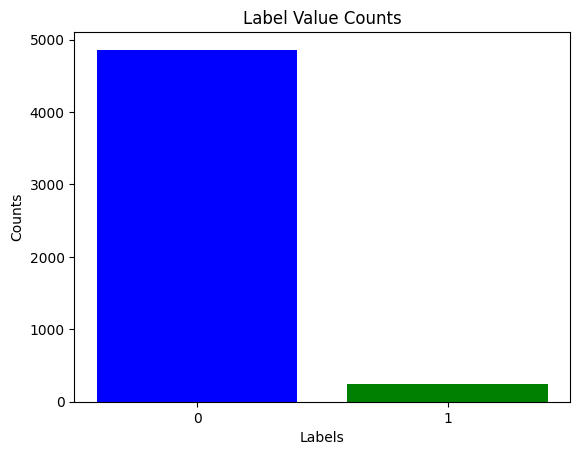

In [10]:
import matplotlib.pyplot as plt

unique_labels, label_counts = np.unique(data['stroke'], return_counts=True)

plt.bar(unique_labels, label_counts, color=['blue', 'green'])  # Adjust colors as needed
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Label Value Counts')
plt.xticks(unique_labels)
plt.show()


Changing Categorical values to numerical values

In [11]:
print(data['gender'].unique())
print(data['ever_married'].unique())
print(data['work_type'].unique())
print(data['Residence_type'].unique())
print(data['smoking_status'].unique())

['Male' 'Female']
['Yes' 'No']
['Private' 'children' 'Self-employed' 'Govt_job' 'Never_worked']
['Rural' 'Urban']
['Unknown' 'never smoked' 'formerly smoked' 'smokes']


In [12]:
data['gender'].replace(['Male', 'Female'], [0, 1], inplace=True)
data['ever_married'].replace(['Yes', 'No'], [0, 1], inplace=True)
data['work_type'].replace(['Private', 'Govt_job', 'Self-employed', 'children', 'Never_worked'], [1, 2, 3, 4, 5], inplace=True)
data['Residence_type'].replace(['Urban', 'Rural'], [0, 1], inplace=True)
data['smoking_status'].replace(['formerly smoked', 'never smoked', 'Unknown', 'smokes'], [1, 2, 3, 4], inplace=True)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,28.0,0,0,0,1,1,169.49,27.200000,3,0
1,0,10.0,0,0,1,4,0,76.92,15.800000,3,0
2,0,56.0,0,0,0,3,1,125.87,24.600000,2,0
3,0,38.0,0,0,0,2,1,98.92,25.500000,2,0
4,0,67.0,0,0,0,1,1,65.51,33.200000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5104,1,75.0,0,0,0,3,1,70.22,24.800000,1,0
5105,1,79.0,1,0,0,3,1,174.12,24.000000,2,1
5106,1,24.0,0,0,1,1,0,90.42,24.300000,2,0
5107,1,18.0,0,0,1,1,1,73.29,28.100000,4,0


## Data Splitting
Splitting the dataset into train, val;idation and test datasets

In [13]:
train_size = int(0.7 * len(data))
test_size = int(0.15 * len(data))

# Spliting the DataFrame into train, test, and validation sets
train_data = data.iloc[:train_size, :]
test_data = data.iloc[train_size:train_size + test_size, :]
val_data = data.iloc[train_size + test_size:, :]

# Separating the features and target for train, test, and validation sets
X_train, y_train = train_data.iloc[:, :-1], train_data.iloc[:, -1:]
X_test, y_test = test_data.iloc[:, :-1], test_data.iloc[:, -1:]
X_val, y_val = val_data.iloc[:, :-1], val_data.iloc[:, -1:]

In [14]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,28.0,0,0,0,1,1,169.49,27.2,3
1,0,10.0,0,0,1,4,0,76.92,15.8,3
2,0,56.0,0,0,0,3,1,125.87,24.6,2
3,0,38.0,0,0,0,2,1,98.92,25.5,2
4,0,67.0,0,0,0,1,1,65.51,33.2,1
...,...,...,...,...,...,...,...,...,...,...
3571,1,40.0,0,0,1,1,1,99.00,25.0,2
3572,1,32.0,0,0,0,1,1,77.67,32.3,4
3573,1,38.0,0,0,0,1,0,151.26,20.6,2
3574,1,5.0,0,0,1,4,1,57.80,17.6,3


In [15]:
X_train.shape[0]

3576

## Feed Forward Network Model Architecture

In [16]:
# Define sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define derivative of sigmoid activation function
def sigmoid_derivative(x):
    return x * (1 - x)

# Define mean squared error loss function
def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

# Define feedforward neural network class
class FeedForwardNN:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size

        # Initialize weights and biases
        self.weights = []
        self.biases = []

        # Initialize weights and biases for hidden layers
        for i in range(len(hidden_sizes)):
            if i == 0:
                self.weights.append(np.random.randn(input_size, hidden_sizes[i]))
            else:
                self.weights.append(np.random.randn(hidden_sizes[i-1], hidden_sizes[i]))
            self.biases.append(np.zeros((1, hidden_sizes[i])))

        # Initialize weights and biases for output layer
        self.weights.append(np.random.randn(hidden_sizes[-1], output_size))
        self.biases.append(np.zeros((1, output_size)))

    # Define forward propagation
    def forward(self, X):
        self.layer_outputs = []
        input_data = X

        for i in range(len(self.weights)):
            layer_input = np.dot(input_data, self.weights[i]) + self.biases[i]
            layer_output = sigmoid(layer_input)
            self.layer_outputs.append(layer_output)
            input_data = layer_output

        return layer_output

    # Define backward propagation
    def backward(self, X, y, learning_rate):
        error = y - self.layer_outputs[-1]
        delta = error * sigmoid_derivative(self.layer_outputs[-1])
        for i in range(len(self.weights) - 1, 0, -1):
            self.weights[i] += learning_rate * np.dot(self.layer_outputs[i-1].T, delta)
            self.biases[i] += learning_rate * np.sum(delta, axis=0)
            error = np.dot(delta, self.weights[i].T)
            delta = error * sigmoid_derivative(self.layer_outputs[i-1])

        self.weights[0] += learning_rate * np.dot(X.T, delta)
        self.biases[0] += learning_rate * np.sum(delta, axis=0)

    # Train the neural network
    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, learning_rate)
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {mse_loss(y, output)}')

    # Predict method
    def predict(self, X):
        return self.forward(X)

Converting dataframe to numpy values

In [17]:
input_size = X_train.shape[1]
X_train = X_train.values.reshape(-1, input_size)
y_train = y_train.values.reshape(-1, 1)
X_val = X_val.values.reshape(-1, input_size)
y_val = y_val.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, input_size)
y_test = y_test.values.reshape(-1, 1)

## a) Feed Forward Network with decreasing hidden layers - (8, 5, 3)

In [18]:
hidden_sizes = [8, 5, 3]
output_size = 1  # For binary classification
ffnn = FeedForwardNN(input_size, hidden_sizes, output_size)

# Train your neural network
ffnn.train(X_train, y_train, epochs=1000, learning_rate=0.01)

# Validate your model
val_output = ffnn.predict(X_val)
val_loss = mse_loss(y_val, val_output)
print(f'Validation Loss: {val_loss}')

# Test your model
test_output = ffnn.predict(X_test)
test_loss = mse_loss(y_test, test_output)
print(f'Test Loss: {test_loss}')

Epoch 0, Loss: 0.27546557017817513
Epoch 100, Loss: 0.04501549893833438
Epoch 200, Loss: 0.04501522304745694
Epoch 300, Loss: 0.04501492430627109
Epoch 400, Loss: 0.04501459976085018
Epoch 500, Loss: 0.045014245925909996
Epoch 600, Loss: 0.045013858659823644
Epoch 700, Loss: 0.04501343300264389
Epoch 800, Loss: 0.04501296296370553
Epoch 900, Loss: 0.045012441239507525
Validation Loss: 0.05344253547892651
Test Loss: 0.06134337063079676


In [20]:
val_predictions = (val_output > 0.5).astype(int)
test_predictions = (test_output > 0.5).astype(int)

In [21]:
print("Model Description")
print("Size of input layer: ", X_train.shape[1])
print("Size of 1st Hidden layer: ", hidden_sizes[0])
print("Size of 2nd Hidden layer: ", hidden_sizes[1])
print("Size of 3rd Hidden layer: ", hidden_sizes[2])
print("Size of Output layer: ", output_size)

Model Description
Size of input layer:  10
Size of 1st Hidden layer:  8
Size of 2nd Hidden layer:  5
Size of 3rd Hidden layer:  3
Size of Output layer:  1


### Metrics for Validation set

In [22]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
val_conf_matrix = confusion_matrix(y_val, val_predictions)
val_classification_rep = classification_report(y_val, val_predictions)
val_accuracy = accuracy_score(y_val, val_predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


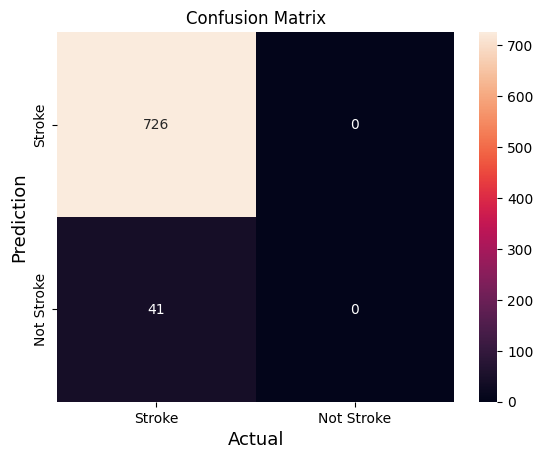

In [23]:
sns.heatmap(val_conf_matrix, annot=True, fmt='g', xticklabels=['Stroke','Not Stroke'], yticklabels=['Stroke','Not Stroke'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix')
plt.show()

In [24]:
print("\nValidation Classification Report:")
print(val_classification_rep)
print("\nValidation Accuracy:", val_accuracy)


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       726
           1       0.00      0.00      0.00        41

    accuracy                           0.95       767
   macro avg       0.47      0.50      0.49       767
weighted avg       0.90      0.95      0.92       767


Validation Accuracy: 0.9465449804432855


### Metrics for Testing set

In [25]:
test_conf_matrix = confusion_matrix(y_test, test_predictions)
test_classification_rep = classification_report(y_test, test_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


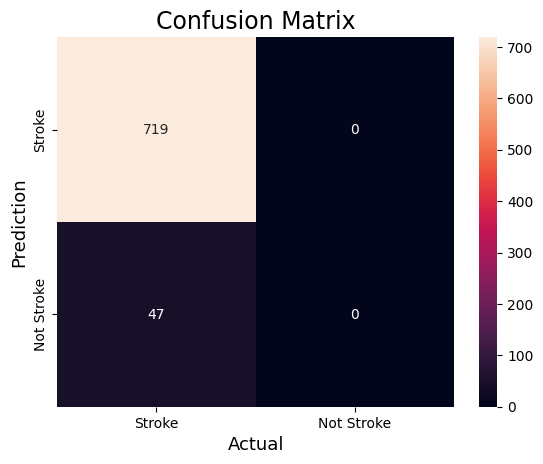

In [26]:
sns.heatmap(test_conf_matrix, annot=True, fmt='g', xticklabels=['Stroke','Not Stroke'], yticklabels=['Stroke','Not Stroke'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [27]:
print("\nTest Classification Report:")
print(test_classification_rep)
print("\nTest Accuracy:", test_accuracy)


Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       719
           1       0.00      0.00      0.00        47

    accuracy                           0.94       766
   macro avg       0.47      0.50      0.48       766
weighted avg       0.88      0.94      0.91       766


Test Accuracy: 0.9386422976501305


## b) Feed Forward Network with increasing and decreasing hidden layers - (64, 128, 32)

In [51]:
data = data.sample(frac=1).reset_index(drop=True)

In [52]:
train_size = int(0.7 * len(data))
test_size = int(0.15 * len(data))

# Split the DataFrame into train, test, and validation sets
train_data = data.iloc[:train_size, :]
test_data = data.iloc[train_size:train_size + test_size, :]
val_data = data.iloc[train_size + test_size:, :]

# Separate features and target for train, test, and validation sets
X_train, y_train = train_data.iloc[:, :-1], train_data.iloc[:, -1:]
X_test, y_test = test_data.iloc[:, :-1], test_data.iloc[:, -1:]
X_val, y_val = val_data.iloc[:, :-1], val_data.iloc[:, -1:]

In [53]:
input_size = X_train.shape[1]
X_train = X_train.values.reshape(-1, input_size)
y_train = y_train.values.reshape(-1, 1)
X_val = X_val.values.reshape(-1, input_size)
y_val = y_val.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, input_size)
y_test = y_test.values.reshape(-1, 1)

In [54]:
# Define sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define derivative of sigmoid activation function
def sigmoid_derivative(x):
    return x * (1 - x)

# Define mean squared error loss function
def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

# Define feedforward neural network class
class FeedForwardNN:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size

        # Initialize weights and biases
        self.weights = []
        self.biases = []

        # Initialize weights and biases for hidden layers
        for i in range(len(hidden_sizes)):
            if i == 0:
                self.weights.append(np.random.randn(input_size, hidden_sizes[i]))
            else:
                self.weights.append(np.random.randn(hidden_sizes[i-1], hidden_sizes[i]))
            self.biases.append(np.zeros((1, hidden_sizes[i])))

        # Initialize weights and biases for output layer
        self.weights.append(np.random.randn(hidden_sizes[-1], output_size))
        self.biases.append(np.zeros((1, output_size)))

    # Define forward propagation
    def forward(self, X):
        self.layer_outputs = []
        input_data = X

        for i in range(len(self.weights)):
            layer_input = np.dot(input_data, self.weights[i]) + self.biases[i]
            layer_output = sigmoid(layer_input)
            self.layer_outputs.append(layer_output)
            input_data = layer_output

        return layer_output

    # Define backward propagation
    def backward(self, X, y, learning_rate):
        error = y - self.layer_outputs[-1]
        delta = error * sigmoid_derivative(self.layer_outputs[-1])
        for i in range(len(self.weights) - 1, 0, -1):
            self.weights[i] += learning_rate * np.dot(self.layer_outputs[i-1].T, delta)
            self.biases[i] += learning_rate * np.sum(delta, axis=0)
            error = np.dot(delta, self.weights[i].T)
            delta = error * sigmoid_derivative(self.layer_outputs[i-1])

        self.weights[0] += learning_rate * np.dot(X.T, delta)
        self.biases[0] += learning_rate * np.sum(delta, axis=0)

    # Train the neural network
    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, learning_rate)
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {mse_loss(y, output)}')

    # Predict method
    def predict(self, X):
        return self.forward(X)

In [55]:
hidden_sizes = [64, 128, 32]
output_size = 1  # For binary classification
ffnn2 = FeedForwardNN(input_size, hidden_sizes, output_size)

# Train your neural network
ffnn2.train(X_train, y_train, epochs=1000, learning_rate=0.01)

# Validate your model
val_output = ffnn2.predict(X_val)
val_loss = mse_loss(y_val, val_output)
print(f'Validation Loss: {val_loss}')

# Test your model
test_output = ffnn2.predict(X_test)
test_loss = mse_loss(y_test, test_output)
print(f'Test Loss: {test_loss}')

<ipython-input-54-3377d463e66a>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 0, Loss: 0.9261464520482356
Epoch 100, Loss: 0.04549444479060116
Epoch 200, Loss: 0.04671177301762409
Epoch 300, Loss: 0.044777287790577845
Epoch 400, Loss: 0.04797955127347236
Epoch 500, Loss: 0.04486105926353438
Epoch 600, Loss: 0.04808579312905772
Epoch 700, Loss: 0.048049598383799456
Epoch 800, Loss: 0.043224916318203487
Epoch 900, Loss: 0.046406594627503954
Validation Loss: 0.04608979177577724
Test Loss: 0.052597920031795406


In [56]:
val_predictions = (val_output > 0.5).astype(int)
test_predictions = (test_output > 0.5).astype(int)

In [57]:
print("Model Description")
print("Size of input layer: ", X_train.shape[1])
print("Size of 1st Hidden layer: ", hidden_sizes[0])
print("Size of 2nd Hidden layer: ", hidden_sizes[1])
print("Size of 3rd Hidden layer: ", hidden_sizes[2])
print("Size of Output layer: ", output_size)

Model Description
Size of input layer:  10
Size of 1st Hidden layer:  64
Size of 2nd Hidden layer:  128
Size of 3rd Hidden layer:  32
Size of Output layer:  1


### Metric for Validation Set

In [58]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
val_conf_matrix = confusion_matrix(y_val, val_predictions)
val_classification_rep = classification_report(y_val, val_predictions)
val_accuracy = accuracy_score(y_val, val_predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


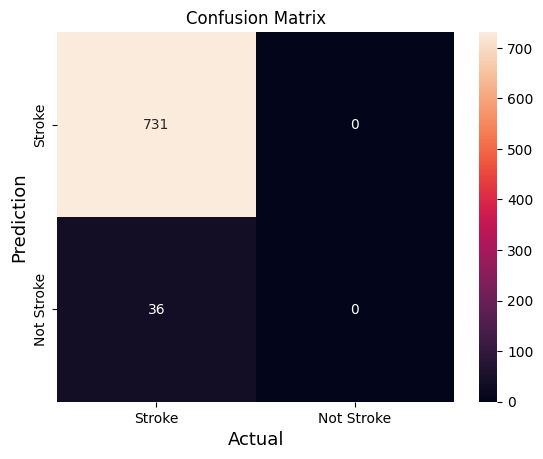

In [59]:
sns.heatmap(val_conf_matrix, annot=True, fmt='g', xticklabels=['Stroke','Not Stroke'], yticklabels=['Stroke','Not Stroke'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix')
plt.show()

In [60]:
print("\nValidation Classification Report:")
print(val_classification_rep)
print("\nValidation Accuracy:", val_accuracy)


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       731
           1       0.00      0.00      0.00        36

    accuracy                           0.95       767
   macro avg       0.48      0.50      0.49       767
weighted avg       0.91      0.95      0.93       767


Validation Accuracy: 0.9530638852672751


### Metrics for Testing Set

In [61]:
test_conf_matrix = confusion_matrix(y_test, test_predictions)
test_classification_rep = classification_report(y_test, test_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


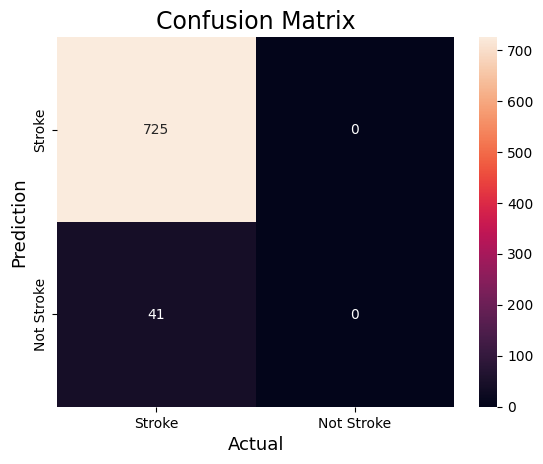

In [62]:
sns.heatmap(test_conf_matrix, annot=True, fmt='g', xticklabels=['Stroke','Not Stroke'], yticklabels=['Stroke','Not Stroke'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [63]:
print("\nTest Classification Report:")
print(test_classification_rep)
print("\nTest Accuracy:", test_accuracy)


Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       725
           1       0.00      0.00      0.00        41

    accuracy                           0.95       766
   macro avg       0.47      0.50      0.49       766
weighted avg       0.90      0.95      0.92       766


Test Accuracy: 0.9464751958224543
